In [34]:
import pandas as pd
import numpy as np

In [35]:
# data = download then read the excel file in the teams folder- called exchange rate data
data = pd.read_excel("C:/Users/Kavita manoj/Downloads/Exchange rate data (1).xlsx", index_col=0)

In [36]:
data.head()

,US Dollar,Pound Sterling,Euro,Japanese Yen
Date,,,,
2022-10-07,82.4000,91.6942,80.5460,56.82
2022-10-06,81.7044,92.5221,80.9603,56.53
2022-10-04,81.4267,92.4714,80.2677,56.22
2022-10-03,81.7417,91.8106,80.2409,56.41
2022-09-30,81.5522,90.7703,80.1093,56.44


In [37]:
gbp = data['Pound Sterling']
gbp.head()

Date
2022-10-07    91.6942
2022-10-06    92.5221
2022-10-04    92.4714
2022-10-03    91.8106
2022-09-30    90.7703
Name: Pound Sterling, dtype: float64

<AxesSubplot:xlabel='Date'>

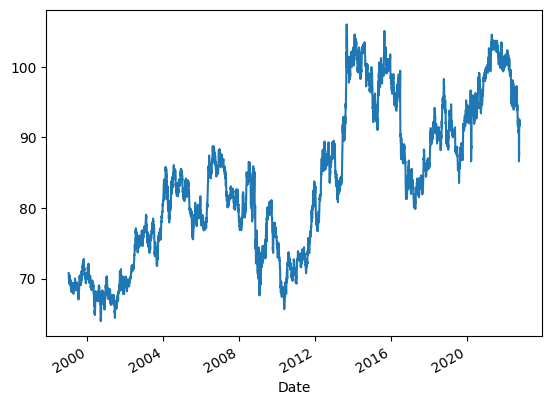

In [38]:
gbp.plot()

In [39]:
gbp_monthly = gbp.resample('M').mean()

In [40]:
gbp_monthly.head()

Date
1999-01-31    70.132150
1999-02-28    69.329644
1999-03-31    68.762979
1999-04-30    68.774329
1999-05-31    69.060371
Freq: M, Name: Pound Sterling, dtype: float64

<AxesSubplot:xlabel='Date'>

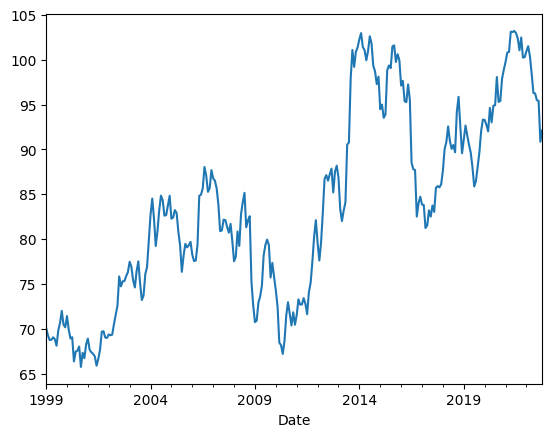

In [41]:
gbp_monthly.plot()

In [42]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(gbp_monthly, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags-used', 'number-of-observations-used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] =value

In [43]:
dfoutput

Test Statistic                  -1.886991
p-value                          0.338206
#lags-used                       1.000000
number-of-observations-used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64

In [44]:
gbp_monthly_log = np.log(gbp_monthly)

In [45]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(gbp_monthly_log, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags-used', 'number-of-observations-used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] =value

In [46]:
dfoutput

Test Statistic                  -1.919250
p-value                          0.323060
#lags-used                       1.000000
number-of-observations-used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64

In [47]:
shifted = gbp_monthly_log.shift(1)
gbp_monthly_log_diff = gbp_monthly_log - shifted
gbp_monthly_log_diff.dropna(inplace=True)

In [48]:
dftest = adfuller(gbp_monthly_log_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags-used', 'number-of-observations-used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] =value

In [49]:
dfoutput

Test Statistic                -1.444587e+01
p-value                        7.231563e-27
#lags-used                     0.000000e+00
number-of-observations-used    2.840000e+02
Critical Value (1%)           -3.453587e+00
Critical Value (5%)           -2.871771e+00
Critical Value (10%)          -2.572222e+00
dtype: float64

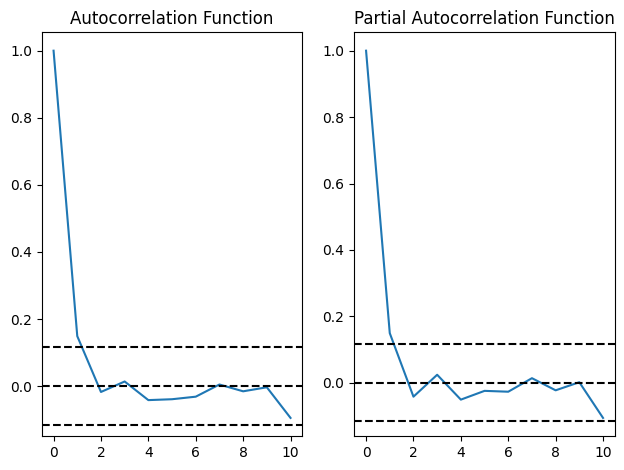

In [50]:
#ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf, pacf
import matplotlib.pyplot as plt
lag_auto_corr = acf(gbp_monthly_log_diff, nlags=10)
lag_par_auto_corr = pacf(gbp_monthly_log_diff, nlags=10, method='ols')

 

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(gbp_monthly_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(gbp_monthly_log_diff)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

 

#Plot PACF:
plt.subplot(122)
plt.plot(lag_par_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(gbp_monthly_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(gbp_monthly_log_diff)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
gbp_monthly_log_diff_reshaped = gbp_monthly_log_diff.values.reshape(-1)

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


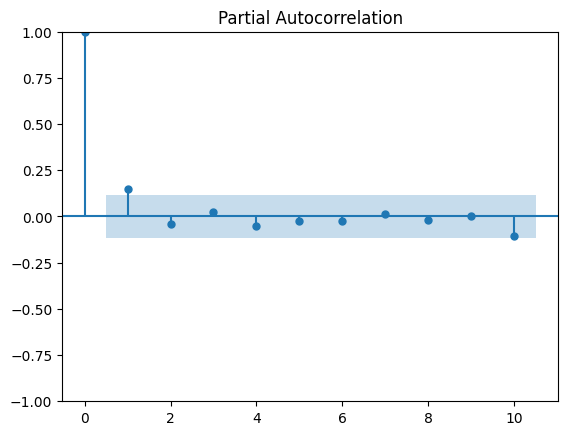

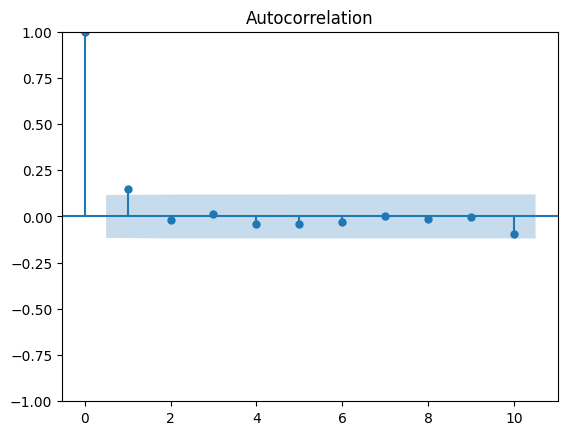

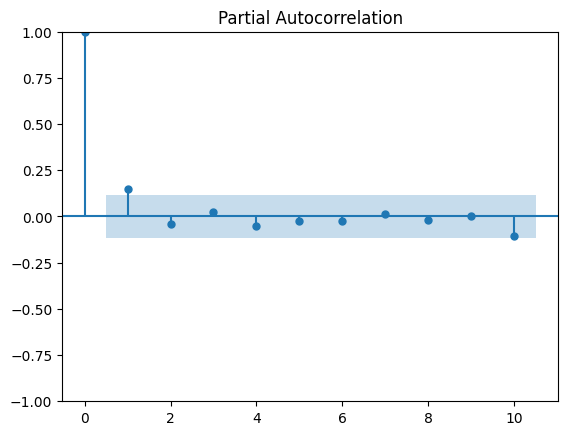

In [53]:
plot_acf(gbp_monthly_log_diff_reshaped, lags=10)
plot_pacf(gbp_monthly_log_diff_reshaped, lags=10)

In [54]:
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(gbp_monthly_log_diff, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Pound Sterling   No. Observations:                  285
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 676.943
Date:                Mon, 04 Sep 2023   AIC                          -1347.885
Time:                        16:45:02   BIC                          -1336.939
Sample:                    02-28-1999   HQIC                         -1343.497
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1531      0.068      2.239      0.025       0.019       0.287
ma.L1         -1.0000     10.846     -0.092      0.927     -22.259      20.259
sigma2         0.0005      0.005      0.092      0.9

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
model = ARIMA(gbp_monthly_log_diff, order=(0, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Pound Sterling   No. Observations:                  285
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 673.587
Date:                Mon, 04 Sep 2023   AIC                          -1343.174
Time:                        16:45:19   BIC                          -1335.876
Sample:                    02-28-1999   HQIC                         -1340.248
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9999      3.485     -0.287      0.774      -7.831       5.831
sigma2         0.0005      0.002      0.289      0.773      -0.003       0.004
Ljung-Box (L1) (Q):                   6.46   Jarque-

Text(0.5, 1.0, 'RSS: 0.1439')

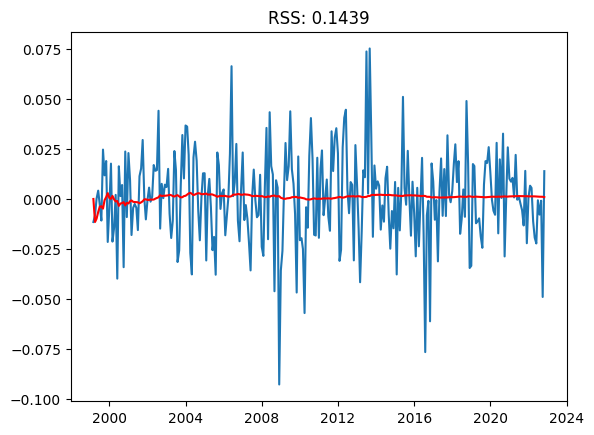

In [56]:
plt.plot(gbp_monthly_log_diff.index.to_pydatetime(), gbp_monthly_log_diff.values)
plt.plot(gbp_monthly_log_diff.index.to_pydatetime(), model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-gbp_monthly_log_diff)**2))